# 应用实例二 房价模型

文件ex1house1是某市的房屋交易数据，其中第一列为房屋面积（平米），第二列为成交价格（单位：万元）。请用一元线性回归解决此房产估值模型。

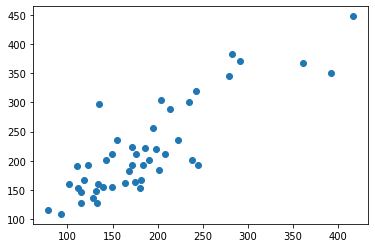

,面积(平米）,售价(万元)
0,195.0,255.936
1,149.0,211.136
2,223.0,236.160
3,132.0,148.480
4,279.0,345.536


In [4]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#读入房价数据
df = pd.read_csv('ex1house1.csv', header=None, names=['面积(平米）','售价(万元)'])  
x = df.values[:,0]
y = df.values[:,1]
plt.plot(x,y,'o',label='Oringinal data')
plt.show()
df.head()

/var/folders/45/71d2n3xs7zq0mc4_4k56d0b00000gn/T/ipykernel_23659/1139782394.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


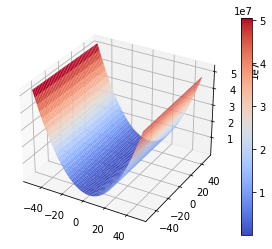

In [5]:
#%% 代价函数、损失函数
m=len(x)
J_vals = np.zeros([100, 100])#initialize Jvals to 100x100 matrix of 0's
w_vals = np.linspace(-50, 50, 100)
b_vals = np.linspace(-50, 50, 100)
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        J_vals[i,j] =0    ## <-- EDIT THIS LINE
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y=np.meshgrid(w_vals,b_vals)
J_val=J_vals.T
surf=ax.plot_surface(X,Y,J_val,cmap="coolwarm")
plt.colorbar(surf)

代价函数

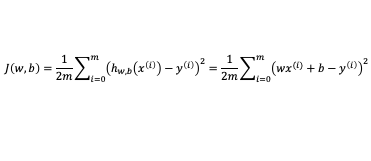

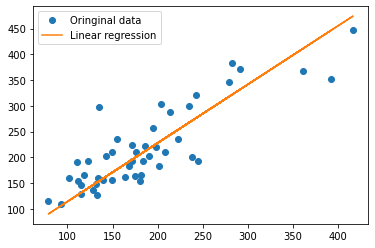

In [6]:
# %%         梯度下降求解
m=len(y)
alpha=0.000007
w=0
b=0
epoch=150
for j in range(epoch):
#%your code here----------
  d_w=0     ## <-- EDIT THIS LINE
  d_b=0     ## <-- EDIT THIS LINE
  w-=alpha*d_w
  b-=alpha*d_b
#% your code here----------
y1=w*x+b
plt.plot(x,y,'o',label='Oringinal data')
plt.plot(x,y1,label='Linear regression')
plt.legend()

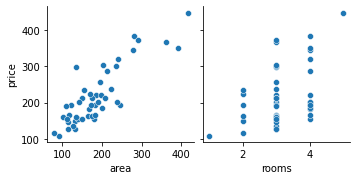

,area,rooms,price
0,195.0,3,255.936
1,149.0,3,211.136
2,223.0,3,236.160
3,132.0,2,148.480
4,279.0,4,345.536


In [9]:
# 二元房价回归模型

df = pd.read_csv('ex1house2.csv', header=None, names=['area','rooms','price'])  
X = df.values[:,:2]
y = df.values[:,2]
sns.pairplot(df,y_vars='price',x_vars=['area','rooms'], diag_kind='kde')
plt.show()
df.head()


[26866.298104404974, 1985.7426905600903, 987.6118116863531, 981.6496427308538, 981.610049126475, 981.6058095035353, 981.6017811382741, 981.5977542524213, 981.5937275937313, 981.5897011547169, 981.5856749353194]


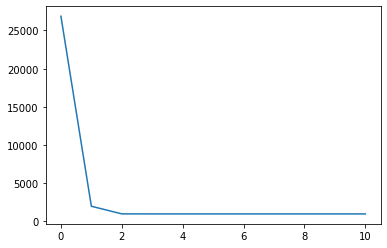

In [10]:
m=len(y)
w1=0
w2=0
b=0
numMax=10
alpha=0.00003
J=[]
J.append(sum((w1*X[:,0]+w2*X[:,1]+b-y)**2)/m/2)
for k in range(numMax):
    # 梯度
    db=0  ## <-- EDIT THIS LINE
    dw1=0 ## <-- EDIT THIS LINE
    dw2=0 ## <-- EDIT THIS LINE
    b-=alpha*db
    w1-=alpha*dw1
    w2-=alpha*dw2
    J.append(sum((w1*X[:,0]+w2*X[:,1]+b-y)**2)/m/2)
    if k%500==0:
        alpha*=0.9
plt.plot(J)
print(J)

In [ ]:
# %%
def draw_infer_result(groud_truths,infer_results):
    title='Boston'
    plt.title(title, fontsize=24)
    x = np.arange(1,max(groud_truths) )
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(groud_truths, infer_results,color='green',label='training cost') 
    plt.grid()
    plt.show()

# 测试数据特征值与回归值切分
#x_test,y_test = test_data[:,:13],test_data[:,-1:]
# 预测
w=np.array([w1,w2])
predict = X@w+b #model.predict(x_test)
# 绘制对比图
draw_infer_result(y,predict)


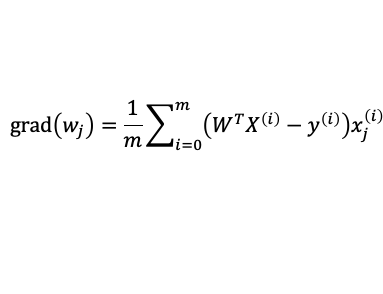

[25694.194793825925, 1982.1604915724072, 1020.4892901523748, 983.3327728859238, 981.8905646068793, 981.8309130256516, 981.8242122031662, 981.8196515348884, 981.8151554167391, 981.810665674687, 981.8061757291906]


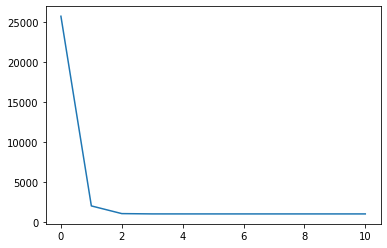

In [11]:
#归一化
X=X   ## <-- EDIT THIS LINE

#梯度下降
X=np.concatenate([np.ones([len(y),1]),X],axis=1)#x=[1,x]
w=np.zeros(3)
dw=np.zeros(3)
numMax=10
alpha=0.00003
J=[]
J.append(sum((w1*X[:,0]+w2*X[:,1]+b-y)**2)/m/2)
for k in range(numMax):
  for j in range(len(w)):# 逐个求梯度

    dw[j]=0     ## <-- EDIT THIS LINE
    
    w[j]-=alpha*dw[j]

  J.append(sum((X@w-y)**2)/m/2)

plt.plot(J)
print(J)


# 应用实例3 波士顿房价模型

波士顿房屋数据集于1978年开始统计;涵盖了麻省波士顿不同郊区房屋14种特征的信息;共有506个样本，每个样本有13个特征及标签MEDV.
波士顿房价统计数据如下所示

    特征名  解释                          类型

    CRIM 城镇人均犯罪率                    连续

    ZN  面积超过2.5万平的住宅用地比例        连续

    INDUS 非零售商业地区比例               连续

    CHAS 是否邻近Charies River( 邻:1)     离散

    NOX 一氧化氮浓度                      连续

    RM 每栋房屋的平均客房数                连续

    AGE 1940年之前建成的自用单位比例        连续

    DIS 到波士顿5个就业中心的加权距高       连续

    RAD 到径向公路的可达性指数             连续

    TAX 全值财产稅率                     连续

    PTRATIO 学生与教师的比例              连续

    B  $1000(BK-0.63)^2$, BK为黑人占比   连续

    LSTAT  低收入人群占比                连续

    MEDV  同类房屋价格的中位数            连续

假设房价和各影响因素之间能够用线性关系来描述：

 $y = {\sum_{j=1}^M w_j x_j } + b={\sum_{j=0}^M w_j x_j }$


/Users/macbook/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

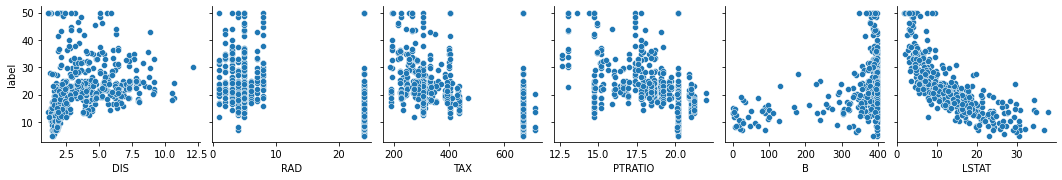

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn import datasets  # 导入数据集
boston = datasets.load_boston()
X = boston.data   # 特征值
y = boston.target  # 目标变量

df = pd.DataFrame(
    X,
    columns = boston.feature_names
)
df['label']=y
sns.pairplot(df,y_vars='label', x_vars=boston.feature_names[7:], diag_kind='kde')
plt.show()
df.head()

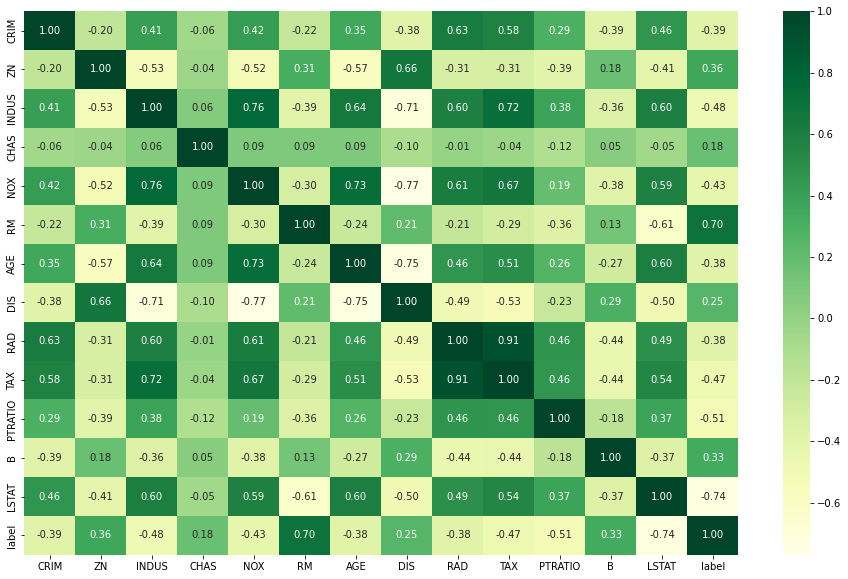

In [6]:
corr=df.corr()#相关系数
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="YlGn")
plt.show()

In [7]:
#%% 归一化
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
#可选相关度高的前几项作为特征
X=X  #  <-----edit this line

#为增加偏置b进w而增加𝑥_0≡1后，shape变为(506,14)
X=np.concatenate([np.ones([len(y),1]),X],axis=1)
print(X.shape)#(506, 14)

(506, 14)


In [8]:
def draw_infer_result(groud_truths,infer_results):
    title='Boston'
    plt.title(title, fontsize=24)
    x = np.arange(1,max(groud_truths) )
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(groud_truths, infer_results,color='green',label='training cost') 
    plt.grid()
    plt.show()

In [ ]:
m=len(y)
w=np.zeros([X.shape[1]]) #(14,0)
dw=np.zeros([X.shape[1]])
alpha=0.3
numMax=15

for k in range(numMax):
    #your code here
    
    
    
    #your code here
    J=sum((X@w-y)**2)/m/2
    #print(J)
predict = X@w+b#model.predict(x_test)
# 绘制对比图
draw_infer_result(y,predict)

# 非线性拟合

由三次多项式函数 $g(x)=0.1(x-2)^3 + x^2 - 8x - 1$ 生成一定数量的随机扰动数据样本，样本数据间显然是非线性关系，试用生成的数据集拟合曲线。

In [3]:
import numpy as np
import matplotlib.pyplot as plt

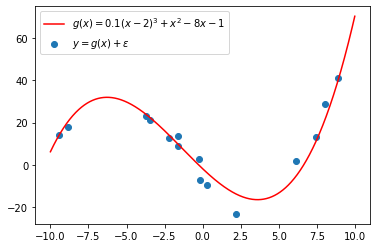

In [7]:
# %%
def true_f(x):
    return 0.1 * (x-2) ** 3 + x ** 2 - 8.0 * x - 1.0

def generate(n_samples):
    X = np.random.rand(n_samples) * 20.0 - 10.0
    y = true_f(X) + 5 * np.random.randn(n_samples)
    
    return X.reshape(n_samples, 1), y

X_train, y_train = generate(15)# 生成15个点
#%%
xs = np.linspace(-10, 10, num=1000)
plt.plot(xs, true_f(xs), c="r", label="$g(x)=0.1(x-2)^3 + x^2 - 8x - 1$")
plt.scatter(X_train, y_train, label="$y = g(x) + \epsilon$")
plt.legend()
plt.show()

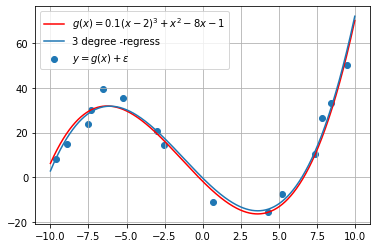

In [5]:

def poly_coef_maxtrix(x,m):# m次多项式超定方程系数矩阵
    x=x.reshape(-1,1)
    X=np.ones([len(x),1])
    for k in range(1,m+1):
        X=X  ##<-----edit this line
    return X
m=3
F=poly_coef_maxtrix(X_train,3)
w=0  ##<-----edit this line

xs = np.linspace(-10, 10, num=1000)
y1=poly_coef_maxtrix(xs,3)@w
plt.plot(xs, true_f(xs), c="r", label="$g(x)=0.1(x-2)^3 + x^2 - 8x - 1$")
plt.plot(xs,y1,label="%d degree -regress"%m)
plt.scatter(X_train, y_train, label="$y = g(x) + \epsilon$")
plt.grid()
plt.legend()

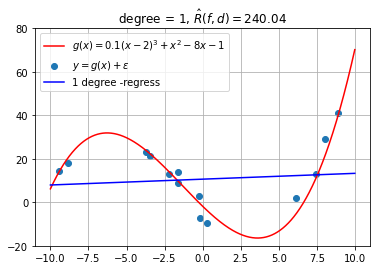

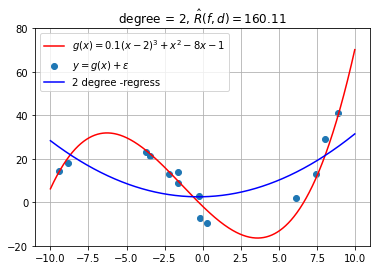

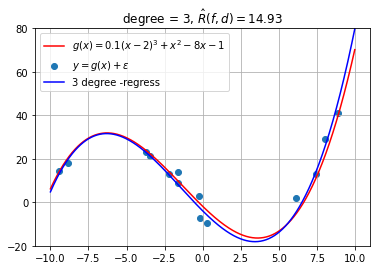

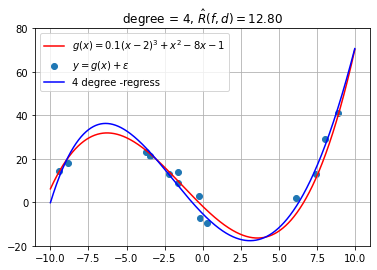

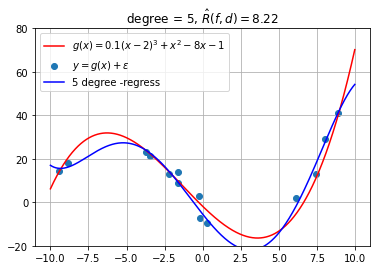

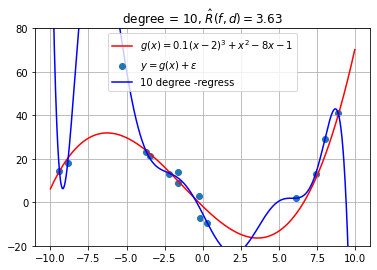

In [8]:
# %% 不同次数多项式
xs = np.linspace(-10, 10, num=1000)
for m in [1, 2, 3, 4, 5, 10]:
    #your code here, look for w
    
    
    
    #your code here
    y1=poly_coef_maxtrix(xs,m)@w
    error = np.mean((y_train - poly_coef_maxtrix(X_train, m)@w) ** 2)
    plt.plot(xs, true_f(xs), c="r", label="$g(x)=0.1(x-2)^3 + x^2 - 8x - 1$")
    plt.scatter(X_train, y_train, label="$y = g(x) + \epsilon$")
    plt.plot(xs,y1,c="b",label="%d degree -regress"%m)
    plt.title("degree = %d, $\hat{R}(f, d) = %.2f$" % (m, error))
    plt.ylim(-20, 80)
    plt.grid()
    plt.legend()
    #remove_frame()
    #plt.savefig("poly-%d.png" % degree)
    plt.show()

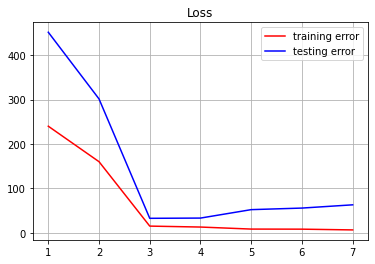

In [9]:
#不同次数多项式在训练集与测试集上误差大小对比
X_test, y_test = generate(1000)
e1=[]#训练点集上的误差
e2=[]#测试点集上的误差
degree=[1, 2, 3, 4, 5,6,7]
for m in degree:
    #your code here
    
    
    
    #your code here
plt.plot(degree, e1, c="r", label="training error")
plt.plot(degree,e2,c="b",label="testing error")
plt.title("Loss")
plt.grid()
plt.legend()
plt.show()

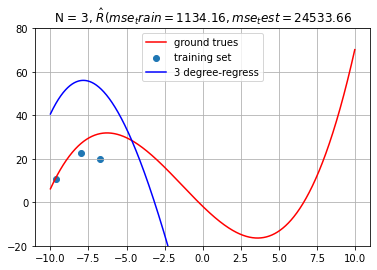

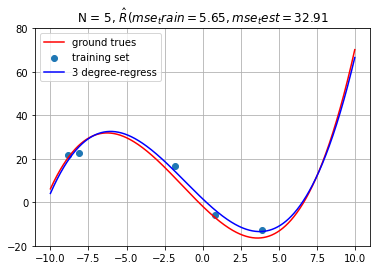

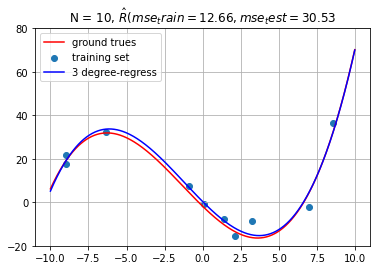

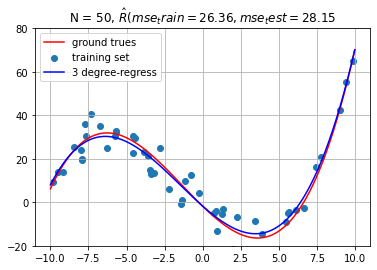

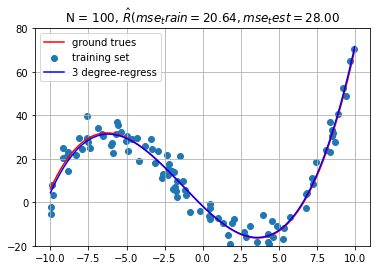

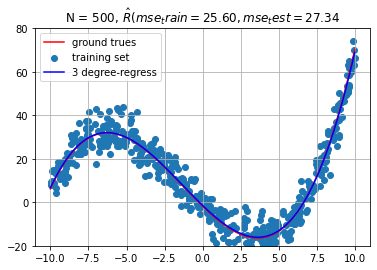

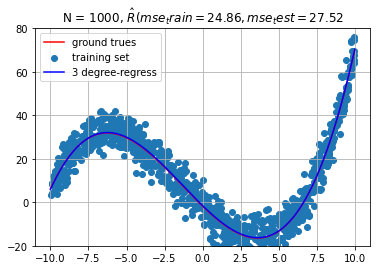

In [11]:
#%% 数据集大小的影响
np.random.seed(777)
m=3
xs = np.linspace(-10, 10, num=1000)
X_test, y_test = generate(1000)
for N in [3,5, 10, 50, 100, 500, 1000]:
    X_train, y_train = generate(N)
    #your code here
    F=
    w= 
    y1=poly_coef_maxtrix(xs,m)@w
    #your code here
    error1 = np.mean((y_train - poly_coef_maxtrix(X_train, m)@w) ** 2)
    error2=np.mean((y_test- poly_coef_maxtrix(X_test, m)@w) ** 2)
    
    plt.plot(xs, true_f(xs), c="r", label="ground trues")
    plt.scatter(X_train, y_train, label="training set")
    plt.plot(xs,y1,c="b",label="%d degree-regress"%m)

    plt.title("N = %d, $\hat{R}(mse_train= %.2f,mse_test=%.2f$" % (N, error1,error2))
    plt.ylim(-20, 80)
    plt.grid()
    plt.legend()
    plt.show()


房价模型直接求解法
$w=(𝑋^′𝑋)^{−1}𝑋^′𝑌$

In [ ]:
#ex1house1.csv  ex1house2.csv
df = pd.read_csv('ex1house1.csv', header=None, names=['面积(平米）','售价(万元)'])  
x = df.values[:,0]
y = df.values[:,1]

X=np.concatenate([np.ones([len(y),1]),x],axis=1)


plt.plot(x,y,'o',label='Oringinal data')
plt.show()
df.head()

$y=w_0cosx+w_1exp{x}+w_2lnx$

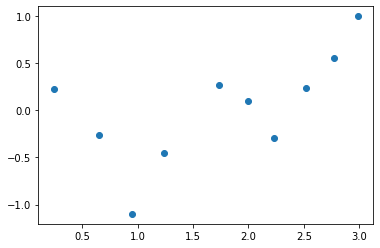

In [13]:
x=[0.24, 0.65, 0.95, 1.24, 1.73, 2.0, 2.23, 2.52, 2.77, 2.99]
y=[0.23, -0.26, -1.10, -0.45, 0.27, 0.10, -0.29, 0.24, 0.56, 1]



plt.plot(x,y,'o',label='Oringinal data')
plt.show()


# 正则化

重新生成15个点做为训练集，40个点做为测试集，分别用1，2，3，4，5，10次多项式拟合曲线，绘图

In [ ]:
X_test, y_test = generate(40)
X_train,y_train=generate(15)
xs = np.linspace(-10, 10, num=1000)
for m in [1, 2, 3, 4, 5, 10]:
    
    w=
    y1=poly_coef_maxtrix(xs,m)@w
    error1 = np.mean((y_train - poly_coef_maxtrix(X_train, m)@w) ** 2)
    error2=np.mean((y_test- poly_coef_maxtrix(X_test, m)@w) ** 2)
    plt.plot(xs, true_f(xs), c="g", label="ground trues")
    plt.scatter(X_train, y_train, label="training set")
    plt.scatter(X_test,y_test,marker='x',label="testing set")
    plt.plot(xs,y1,c="b",label="%d degree -regress"%m)
    plt.title("d= %d, mse_train= %.2f,mse_test=%.2f$" % (m, error1,error2))
    plt.ylim(-25, 80)
    plt.grid()
    plt.legend()
    #plt.savefig("poly-%d.png" % degree)
    plt.show()

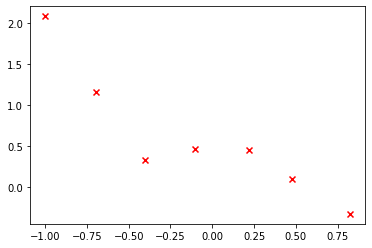

In [14]:
#数据集加载
x=np.array([-0.99768,-0.69574,-0.40373,-0.10236,0.22024,0.47742,0.82229])
y=np.array([2.0885,1.1646,0.3287,0.46013,0.44808,0.10013,-0.32952])
plt.scatter(x, y,marker='x' ,c='r',label="Orignial data")


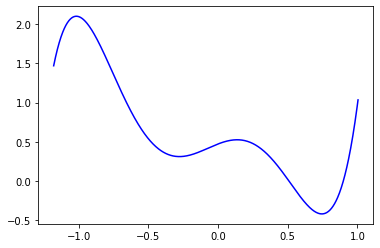

In [15]:
def poly_coef_maxtrix(x,m):#此函数前面有，可去掉
  x=x.reshape(-1,1)
  X=np.ones([len(x),1])
  for k in range(1,m+1):
    X=np.concatenate([X,x**k],axis=1)
  return X
#your code here


#your code here
delta=(np.max(x)-np.min(x))*0.1
xs = np.linspace(np.min(x)-delta, np.max(x)+delta, num=1000)
y1=poly_coef_maxtrix(xs,5)@w1
plt.scatter(x, y,marker='x' ,c='r',label="Orignial data")
plt.plot(xs, y1 ,c='b',label="5 degree poly")
